In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp
from wordcloud.wordcloud import WordCloud

pio.renderers.default = 'notebook'

In [208]:
# dataset :https://www.kaggle.com/dfsets/anuchhetry/product-sales

In [209]:
df = pd.read_excel('data.xlsx')

In [210]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [211]:
df.head()
df.rename(columns={' Sales' : 'Sales'}, inplace=True)

In [212]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

### Line Chart

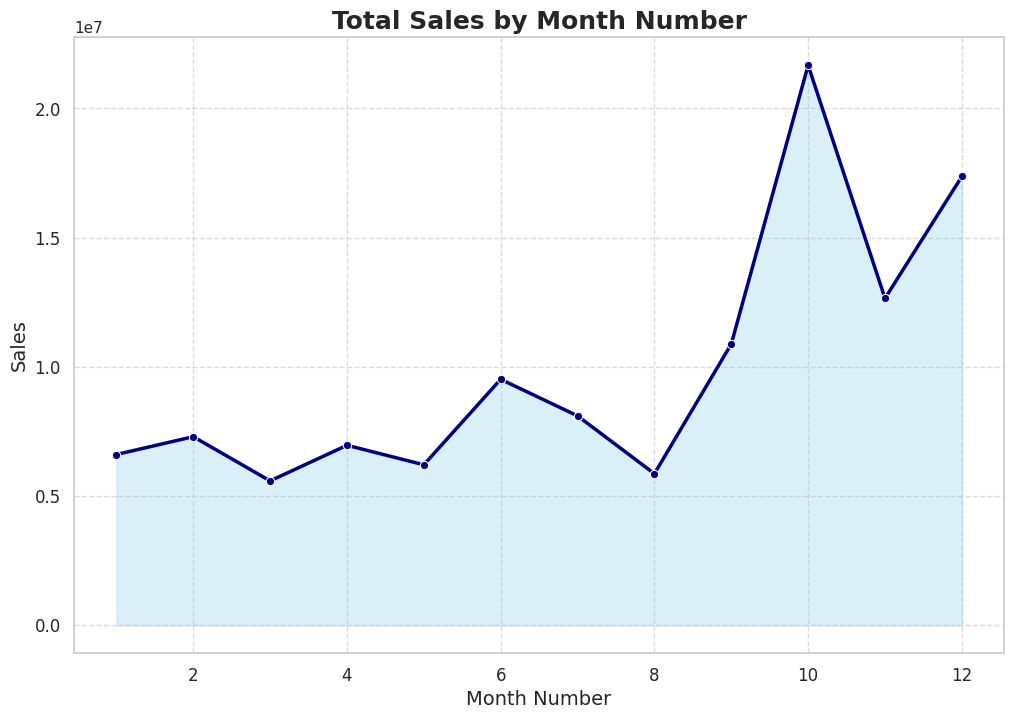

In [213]:
sales_by_month = df.groupby('Month Number')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month Number', y='Sales', data=sales_by_month, marker='o', color='navy', linewidth=2.5)
plt.title('Total Sales by Month Number', fontsize=18, weight='bold')
plt.xlabel('Month Number', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.fill_between(sales_by_month['Month Number'], sales_by_month['Sales'], color='skyblue', alpha=0.3)
plt.show()

### Area Chart

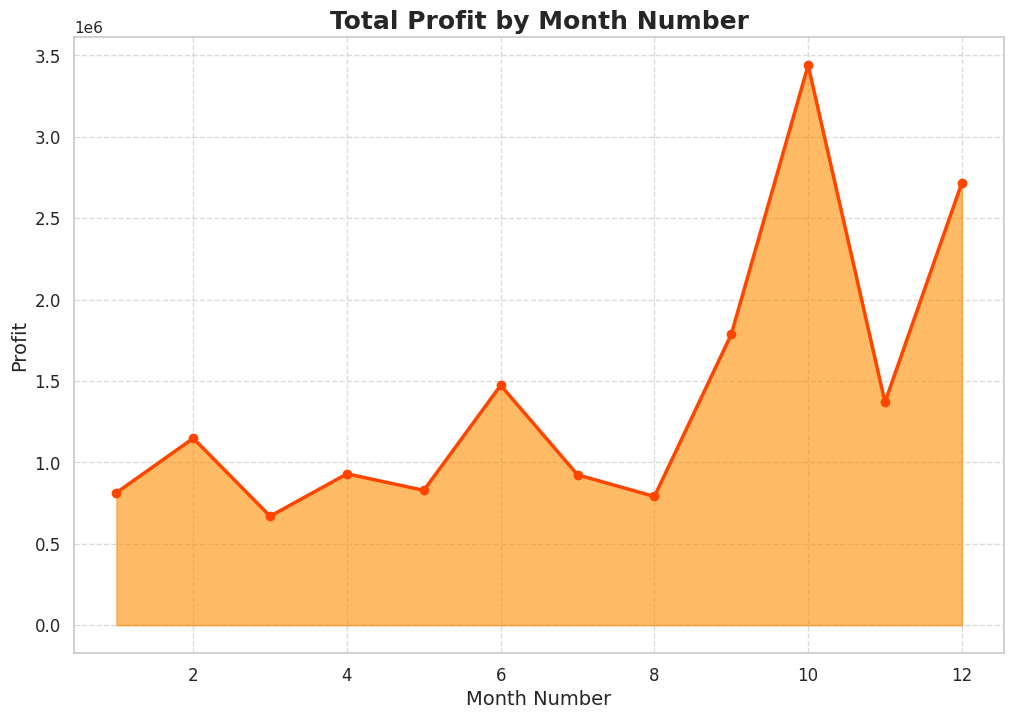

In [214]:
profit_by_month = df.groupby('Month Number')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.fill_between(profit_by_month['Month Number'], profit_by_month['Profit'], color='darkorange', alpha=0.6)
plt.plot(profit_by_month['Month Number'], profit_by_month['Profit'], marker='o', color='orangered', linewidth=2.5)
plt.title('Total Profit by Month Number', fontsize=18, weight='bold')
plt.xlabel('Month Number', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Treemap

In [215]:
fig = px.treemap(df, path=['Product', 'Country'], values='Gross Sales',
                 color='Gross Sales', hover_data=['Profit'],
                 color_continuous_scale='Viridis',
                 title='Treemap: Gross Sales by Product and Country')

fig.update_layout(title_font_size=22, title_font_family='Arial')
fig.show()

### Waterfall Chart

In [216]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()

fig = go.Figure(go.Waterfall(
    name="Profit",
    orientation="v",
    measure=["relative"] * len(profit_by_segment),
    x=profit_by_segment['Segment'],
    y=profit_by_segment['Profit'],
    text=profit_by_segment['Profit'],
    textposition="outside",
    connector={"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(title='Waterfall Chart: Profit by Segment',
                  title_font_size=22,
                  title_font_family='Arial',
                  xaxis_title='Segment',
                  yaxis_title='Profit',
                  xaxis=dict(tickfont=dict(size=14)),
                  yaxis=dict(tickfont=dict(size=14)))

fig.show()

### Funnel Chart

In [217]:
fig = px.funnel(df, x='Units Sold', y='Country', color='Country',
                title='Funnel Chart: Units Sold by Country',
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title_font_size=22, title_font_family='Arial',
                  xaxis_title='Units Sold',
                  yaxis_title='Country',
                  xaxis=dict(tickfont=dict(size=14)),
                  yaxis=dict(tickfont=dict(size=14)))

fig.show()

### Dounut Chart

In [218]:
fig = px.pie(df, names='Product', values='Sales', hole=0.4,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title='Donut Chart: Sales Distribution by Product')

fig.update_traces(textinfo='percent+label', textfont_size=16)
fig.update_layout(title_font_size=22, title_font_family='Arial')

fig.show()


### Word Cloud

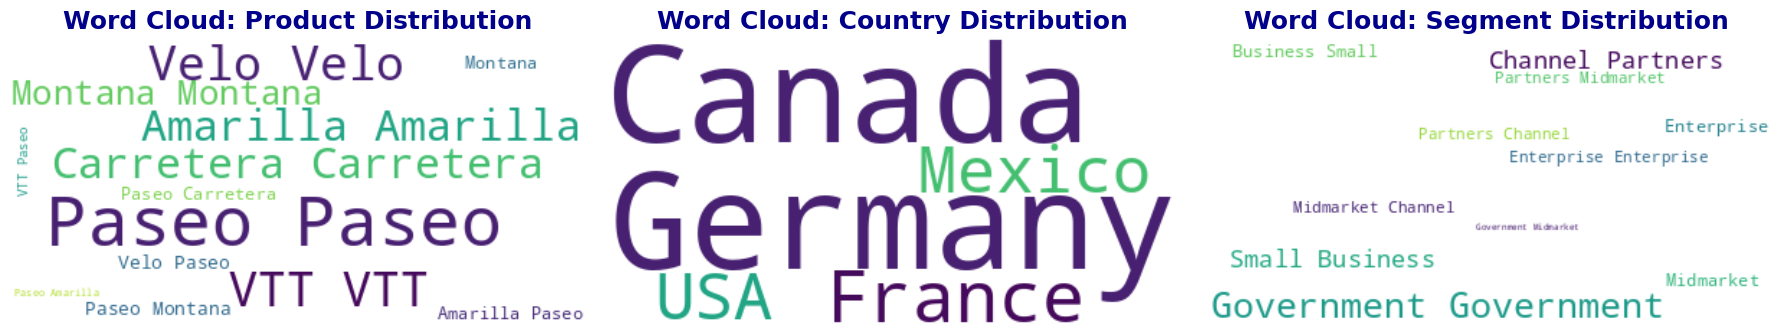

In [219]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Generate and plot word cloud for Product
text_product = ' '.join(df['Product'].astype(str))
wordcloud_product = WordCloud(
    width=400,
    height=200,
    background_color='white',
    colormap='viridis',
    contour_color='black',
    contour_width=1,
    random_state=42
).generate(text_product)

axs[0].imshow(wordcloud_product, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud: Product Distribution', fontsize=18, weight='bold', color='darkblue')

# Generate and plot word cloud for Country
text_country = ' '.join(df['Country'].astype(str))
wordcloud_country = WordCloud(
    width=400,
    height=200,
    background_color='white',
    colormap='viridis',
    contour_color='black',
    contour_width=1,
    random_state=42
).generate(text_country)

axs[1].imshow(wordcloud_country, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Word Cloud: Country Distribution', fontsize=18, weight='bold', color='darkblue')

# Generate and plot word cloud for Segment
text_segment = ' '.join(df['Segment'].astype(str))
wordcloud_segment = WordCloud(
    width=400,
    height=200,
    background_color='white',
    colormap='viridis',
    contour_color='black',
    contour_width=1,
    random_state=42
).generate(text_segment)

axs[2].imshow(wordcloud_segment, interpolation='bilinear')
axs[2].axis('off')
axs[2].set_title('Word Cloud: Segment Distribution', fontsize=18, weight='bold', color='darkblue')

plt.tight_layout()
plt.show()

### Box and Whiskers Plot

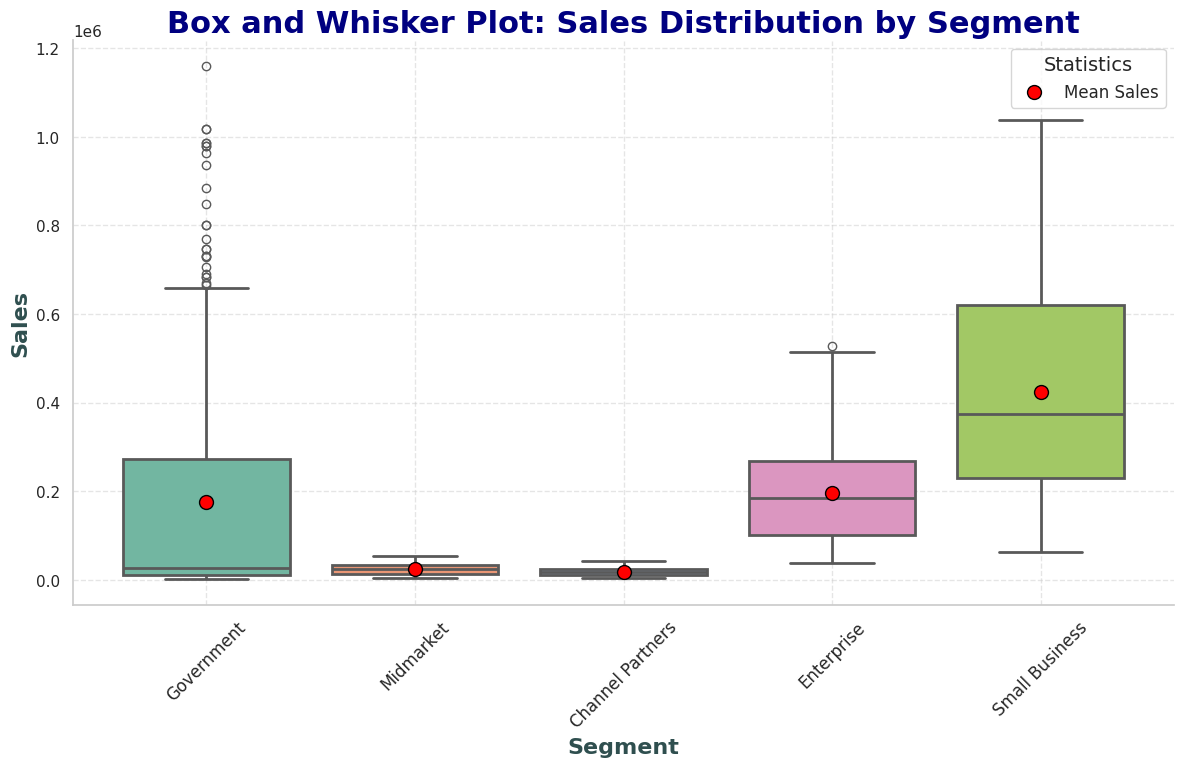

In [220]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 8))
sns.boxplot(x='Segment', y='Sales', data=df, palette='Set2', linewidth=2, hue='Segment', legend=False)

plt.title('Box and Whisker Plot: Sales Distribution by Segment', fontsize=22, weight='bold', color='navy')
plt.xlabel('Segment', fontsize=16, weight='bold', color='darkslategray')
plt.ylabel('Sales', fontsize=16, weight='bold', color='darkslategray')

plt.xticks(rotation=45, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

sns.despine()  

mean_sales = df.groupby('Segment')['Sales'].mean()

plt.scatter(mean_sales.index, mean_sales, color='red', marker='o', s=100, label='Mean Sales', zorder=5, edgecolor='black')

plt.legend(title='Statistics', fontsize=12, title_fontsize='14')

plt.tight_layout()  
plt.show()

### Violin Plot

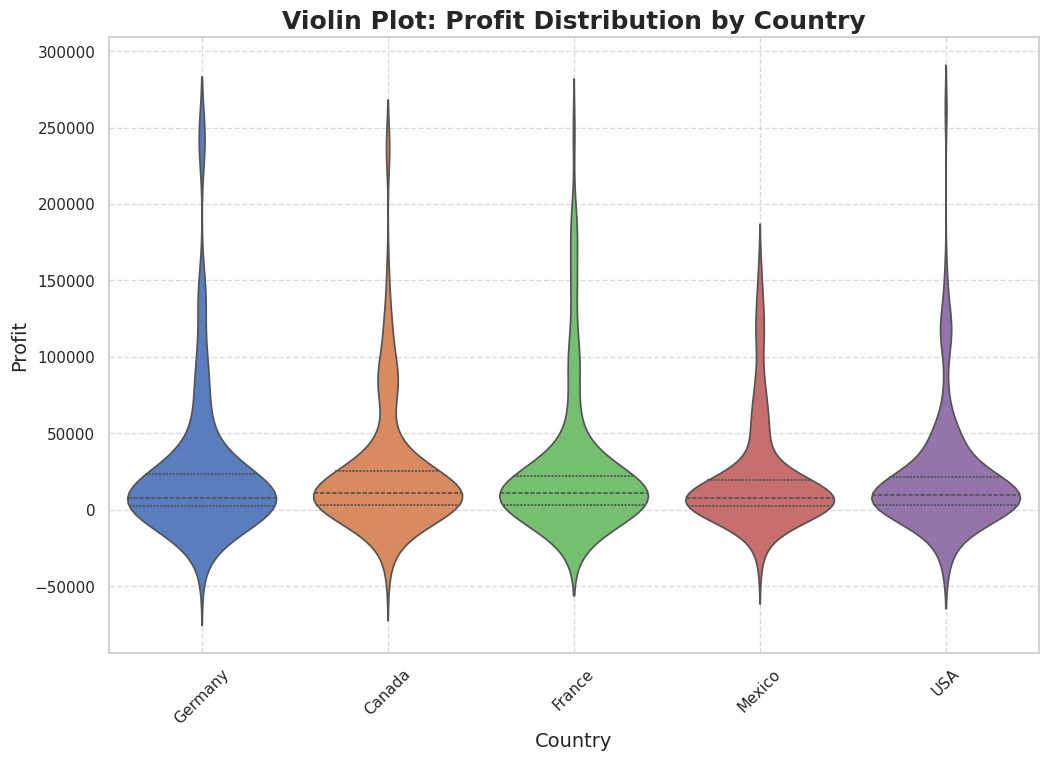

In [221]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country', y='Profit', data=df, palette='muted', inner='quartile', hue='Country', legend=False)
plt.title('Violin Plot: Profit Distribution by Country', fontsize=18, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Regression Plot

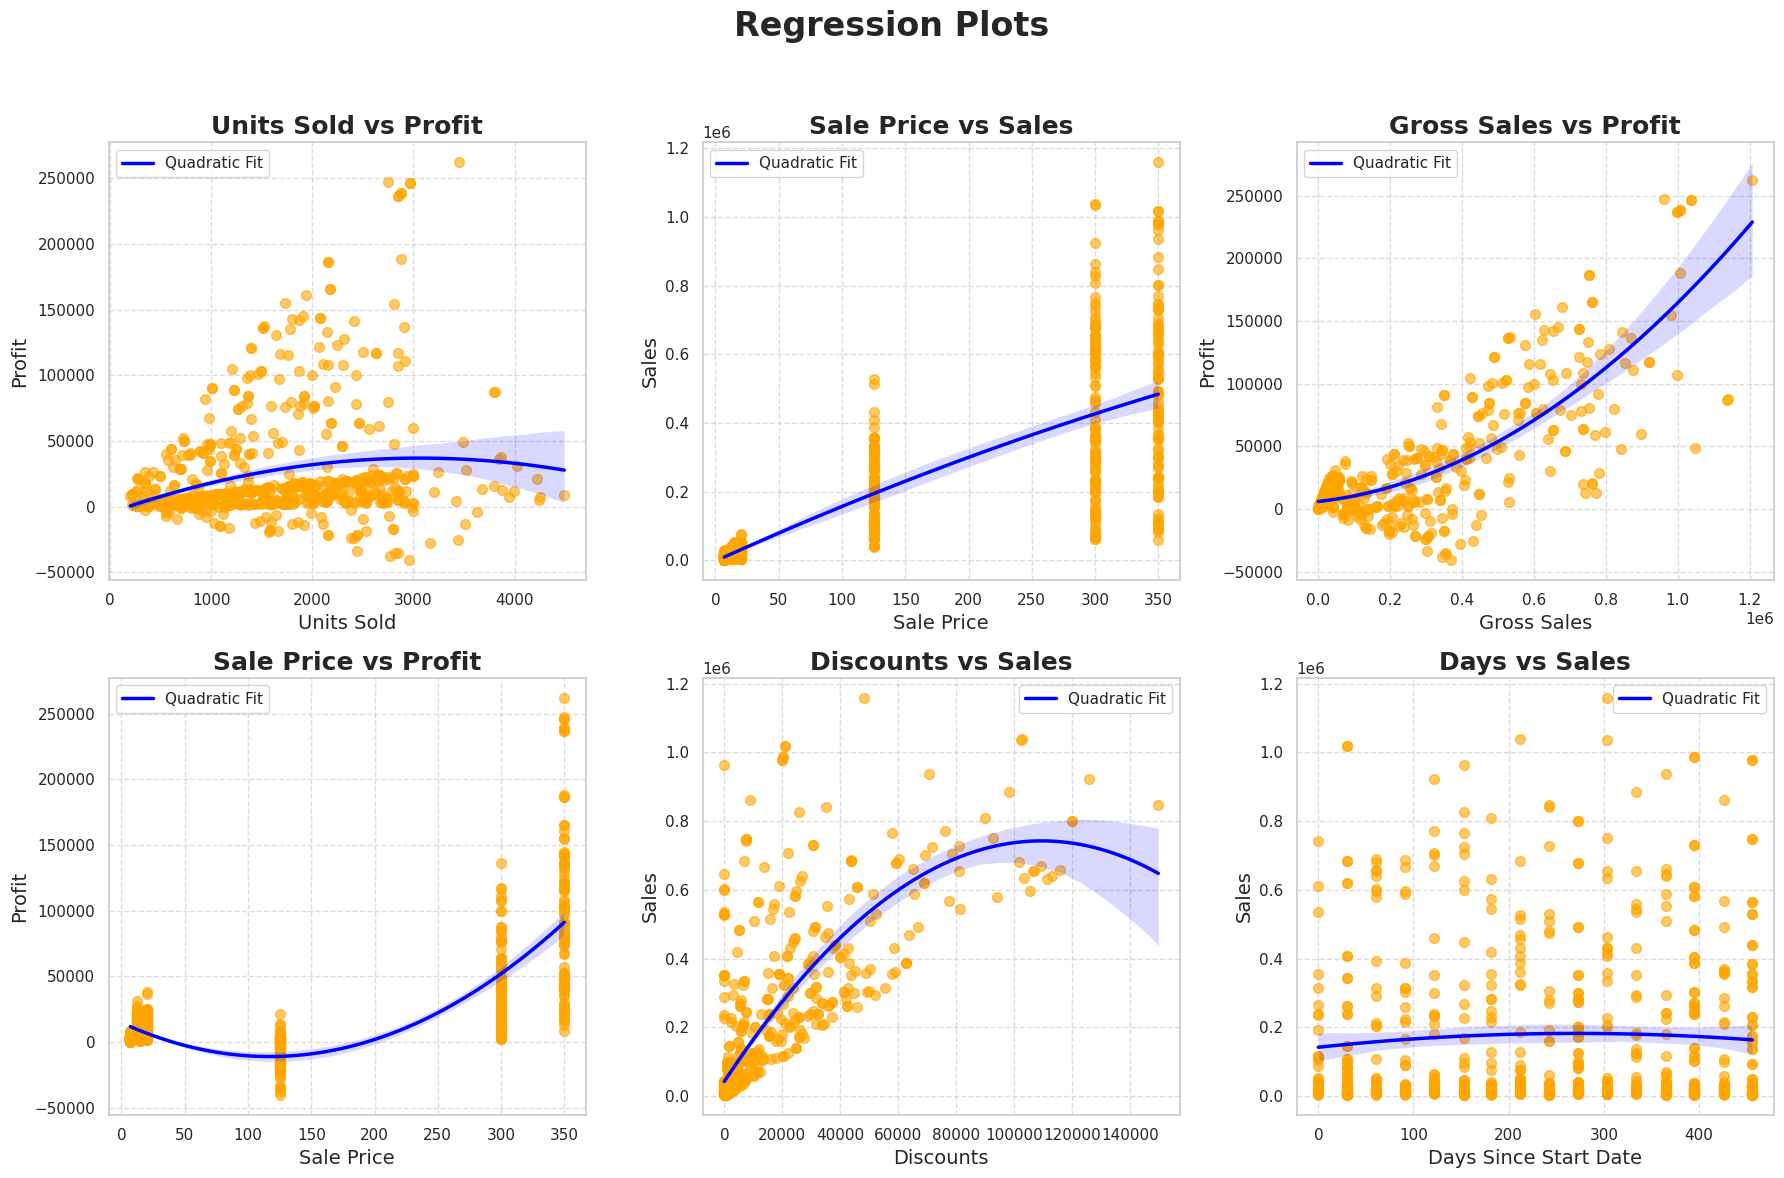

In [222]:
data = df

data['Date'] = pd.to_datetime(data['Date'])
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Plots', fontsize=24, weight='bold')

plots = [
    (data['Units Sold'], data['Profit'], 'Units Sold', 'Profit', 'Units Sold vs Profit'),
    (data['Sale Price'], data['Sales'], 'Sale Price', 'Sales', 'Sale Price vs Sales'),
    (data['Gross Sales'], data['Profit'], 'Gross Sales', 'Profit', 'Gross Sales vs Profit'),
    (data['Sale Price'], data['Profit'], 'Sale Price', 'Profit', 'Sale Price vs Profit'),
    (data['Discounts'], data['Sales'], 'Discounts', 'Sales', 'Discounts vs Sales'),
    (data['Days'], data['Sales'], 'Days Since Start Date', 'Sales', 'Days vs Sales')  # New plot added
]

for ax, (x, y, x_label, y_label, title) in zip(axes.flatten(), plots):
    sns.regplot(x=x, y=y, data=data, 
                ax=ax, 
                scatter_kws={'color': 'orange', 'alpha': 0.6, 's': 50}, 
                line_kws={'color': 'blue', 'linewidth': 2.5, 'label': 'Quadratic Fit'},
                order=2)
    ax.set_title(title, fontsize=18, weight='bold')
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

### 3D Chart

In [223]:
data = df

fig = sp.make_subplots(rows=1, cols=3, 
                        specs=[[{'type':'scatter3d'}, {'type':'scatter3d'}, {'type':'scatter3d'}]],
                        subplot_titles=('Units Sold vs Sale Price vs Profit',
                                        'Units Sold vs Gross Sales vs Profit',
                                        'Sale Price vs Discounts vs Sales'))

fig.add_trace(go.Scatter3d(x=data['Units Sold'], 
                             y=data['Sale Price'], 
                             z=data['Profit'],
                             mode='markers',
                             marker=dict(size=5, opacity=0.8, color='blue', line=dict(width=1, color='DarkSlateGrey')),
                             name='Units Sold vs Sale Price vs Profit'), 
              row=1, col=1)

fig.add_trace(go.Scatter3d(x=data['Units Sold'], 
                             y=data['Gross Sales'], 
                             z=data['Profit'],
                             mode='markers',
                             marker=dict(size=5, opacity=0.8, color='orange', line=dict(width=1, color='DarkSlateGrey')),
                             name='Units Sold vs Gross Sales vs Profit'), 
              row=1, col=2)

fig.add_trace(go.Scatter3d(x=data['Sale Price'], 
                             y=data['Discounts'], 
                             z=data['Sales'],
                             mode='markers',
                             marker=dict(size=5, opacity=0.8, color='green', line=dict(width=1, color='DarkSlateGrey')),
                             name='Sale Price vs Discounts vs Sales'), 
              row=1, col=3)

fig.update_layout(title='3D Scatter Plots of Different Variables',
                  title_font_size=24, 
                  title_font_family='Arial',
                  margin=dict(l=200, r=0, b=20, t=130),  
                  paper_bgcolor='Lavender',
                  scene=dict(xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'))

for i in range(1, 4):
    fig['layout']['scene'+str(i)]['xaxis']['title'] = 'X-axis'
    fig['layout']['scene'+str(i)]['yaxis']['title'] = 'Y-axis'
    fig['layout']['scene'+str(i)]['zaxis']['title'] = 'Z-axis'

for i in range(1, 4):
    fig['layout']['scene'+str(i)]['camera']['eye'] = dict(x=1.5, y=1.5, z=1.5) 
    fig['layout']['scene'+str(i)]['aspectmode'] = 'cube'  

fig.show()

### Jitter Plot

/tmp/ipykernel_20098/1067912296.py:15: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



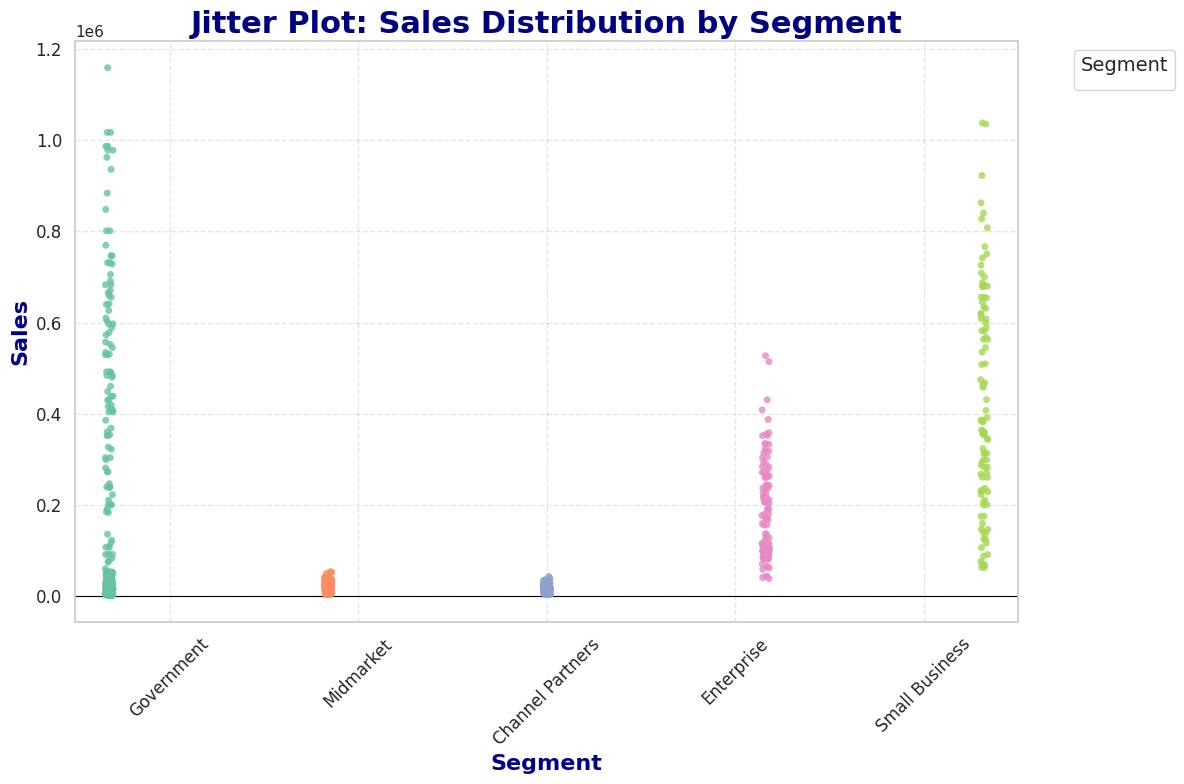

In [224]:
palette = sns.color_palette('Set2', n_colors=len(df['Segment'].unique()))

plt.figure(figsize=(12, 8))
sns.stripplot(x='Segment', y='Sales', data=df, jitter=True, palette=palette, hue='Segment', dodge=True, alpha=0.8)

plt.title('Jitter Plot: Sales Distribution by Segment', fontsize=22, weight='bold', color='navy')
plt.xlabel('Segment', fontsize=16, weight='bold', color='darkblue')
plt.ylabel('Sales', fontsize=16, weight='bold', color='darkblue')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0, color='black', linewidth=0.8) 
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='14', frameon=True)

plt.tight_layout()
plt.show()